# Multicollinearity

SEOYEON CHOI  
2023-07-30

# Import

In [2]:
library(MASS) #lm.ridge
library(car) #vif
library(glmnet) #Ridge, Lasso

완전한 다중공선성 (perfect multicollinearity) 완전한 다중공선성을 갖는
데이터 생성

In [3]:
gen_perfect_collin_data = function(num_samples = 100) {
    x1 = rnorm(n = num_samples, mean = 80, sd = 10)
    x2 = rnorm(n = num_samples, mean = 70, sd = 5)
    x3 = 2 * x1 + 4 * x2 + 3
    y = 3 + x1 + x2 + rnorm(n = num_samples, mean = 0, sd = 1)
    data.frame(y, x1, x2, x3) }

In [4]:
set.seed(42)
perfect_collin_data = gen_perfect_collin_data()
head(perfect_collin_data)

In [5]:
round(cor(perfect_collin_data),4)

-   x3이 x1과 y에 영향을 주는것처럼 보임

In [6]:
perfect_collin_fit = lm(y ~ x1 + x2 + x3, data = perfect_collin_data)
summary(perfect_collin_fit)


Call:
lm(formula = y ~ x1 + x2 + x3, data = perfect_collin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57662 -0.66188 -0.08253  0.63706  2.52057 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.957336   1.735165   1.704   0.0915 .  
x1          0.985629   0.009788 100.702   <2e-16 ***
x2          1.017059   0.022545  45.112   <2e-16 ***
x3                NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.014 on 97 degrees of freedom
Multiple R-squared:  0.9923,    Adjusted R-squared:  0.9921 
F-statistic:  6236 on 2 and 97 DF,  p-value: < 2.2e-16

-   x3을 아예 추정하지 않아버림. 완벽한 다중공선성이 있는 경우.

In [7]:
fit1 = lm(y ~ x1 + x2, data = perfect_collin_data)
fit2 = lm(y ~ x1 + x3, data = perfect_collin_data)
fit3 = lm(y ~ x2 + x3, data = perfect_collin_data)

In [8]:
summary(fit1)


Call:
lm(formula = y ~ x1 + x2, data = perfect_collin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57662 -0.66188 -0.08253  0.63706  2.52057 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.957336   1.735165   1.704   0.0915 .  
x1          0.985629   0.009788 100.702   <2e-16 ***
x2          1.017059   0.022545  45.112   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.014 on 97 degrees of freedom
Multiple R-squared:  0.9923,    Adjusted R-squared:  0.9921 
F-statistic:  6236 on 2 and 97 DF,  p-value: < 2.2e-16

In [9]:
summary(fit2)


Call:
lm(formula = y ~ x1 + x3, data = perfect_collin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57662 -0.66188 -0.08253  0.63706  2.52057 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.194542   1.750225   1.254    0.213    
x1          0.477100   0.015158  31.475   <2e-16 ***
x3          0.254265   0.005636  45.112   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.014 on 97 degrees of freedom
Multiple R-squared:  0.9923,    Adjusted R-squared:  0.9921 
F-statistic:  6236 on 2 and 97 DF,  p-value: < 2.2e-16

In [10]:
summary(fit3)


Call:
lm(formula = y ~ x2 + x3, data = perfect_collin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57662 -0.66188 -0.08253  0.63706  2.52057 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.478892   1.741452   0.849    0.398    
x2          -0.954200   0.030316 -31.475   <2e-16 ***
x3           0.492815   0.004894 100.702   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.014 on 97 degrees of freedom
Multiple R-squared:  0.9923,    Adjusted R-squared:  0.9921 
F-statistic:  6236 on 2 and 97 DF,  p-value: < 2.2e-16

-   fit1, fit2, fit3 의 r square가 같음
-   coeffi가 달라지는 건 당연히…한 설명변수가 설명하던 내용을 다른
    설명변수가 가져갔기 때문에

In [11]:
all.equal(fitted(fit1), fitted(fit2))

TRUE

In [12]:
all.equal(fitted(fit2), fitted(fit3))

TRUE

-   모형이 같다는 결과

In [13]:
coef(fit1)

(Intercept) 2.95733574182584 x1 0.985629075384885 x2 1.01705863569559

In [14]:
coef(fit2)

(Intercept) 2.19454176505438 x1 0.477099757537093 x3 0.254264658923896

In [15]:
coef(fit3)

(Intercept) 1.47889212874875 x2 -0.954199515074185 x3 0.492814537692442

# 완전에 가까운 다중공선성 (approximate multicollinearity)

## 완전에 가까운 다중공선성을 갖는 데이터 생성

In [16]:
gen_almost_collin_data = function(num_samples = 100) {
    x1 = rnorm(n = num_samples, mean = 0, sd = 2)
    x2 = rnorm(n = num_samples, mean = 0, sd = 3)
    x3 = 3*x1 + 1*x2 + rnorm(num_samples, mean=0, sd=0.5)
    y = 3 + x1 + x2 + rnorm(n = num_samples, mean = 0, sd = 1) 
    data.frame(y, x1, x2, x3)
}

-   x3 가 완벽히 상관되어 있지 않고 어느 정도만 상관관계가 있게 만든
    시물레이션 데이터

In [17]:
set.seed(42)
almost_collin_data = gen_almost_collin_data()
head(almost_collin_data)

In [18]:
round(cor(almost_collin_data),3)

In [19]:
m <- lm(y~., almost_collin_data)
summary(m)


Call:
lm(formula = y ~ ., data = almost_collin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7944 -0.5867 -0.1038  0.6188  2.3280 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.03150    0.08914  34.007  < 2e-16 ***
x1           1.21854    0.52829   2.307   0.0232 *  
x2           1.06616    0.18314   5.821 7.71e-08 ***
x3          -0.06322    0.17765  -0.356   0.7227    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8867 on 96 degrees of freedom
Multiple R-squared:  0.9419,    Adjusted R-squared:  0.9401 
F-statistic:   519 on 3 and 96 DF,  p-value: < 2.2e-16

In [20]:
vif(m)
## x1 x2 x3 ## 152.42684 31.07349 186.71999

x1 152.42683903062 x2 31.0734919101687 x3 186.719994280611

-   다중공선성 vif값이 10을 훨씬 넘음

-   되게 불안정

-   car package가 설치가 되지 않아..

In [21]:
set.seed(1000)
noise <- rnorm(n = 100, mean = 0, sd =0.5)
m_noise <- lm(y+noise~., almost_collin_data)
summary(m_noise)


Call:
lm(formula = y + noise ~ ., data = almost_collin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0962 -0.6998 -0.0891  0.7726  2.8462 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.0403     0.1020  29.815  < 2e-16 ***
x1            0.9894     0.6043   1.637    0.105    
x2            0.9898     0.2095   4.725 7.88e-06 ***
x3            0.0158     0.2032   0.078    0.938    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.014 on 96 degrees of freedom
Multiple R-squared:  0.9259,    Adjusted R-squared:  0.9236 
F-statistic:   400 on 3 and 96 DF,  p-value: < 2.2e-16

-   y 에 noise 살짝 줘보기

In [22]:
round(coef(m),3)

(Intercept) 3.032 x1 1.219 x2 1.066 x3 -0.063

In [23]:
round(coef(m_noise),3)

(Intercept) 3.04 x1 0.989 x2 0.99 x3 0.016

## 다중공선성이 없는 경우 비교

In [24]:
m1 <- lm(y~x1+x2, almost_collin_data)
m1_noise <- lm(y+noise~x1+x2, almost_collin_data)

In [28]:
vif(m1)

x1 1.00097938645275 x2 1.00097938645275

In [29]:
round(coef(m1),3)

(Intercept) 3.031 x1 1.031 x2 1.002

In [30]:
round(coef(m1_noise),3)

(Intercept) 3.04 x1 1.036 x2 1.006

noise 주니 비교적 안정적으로 보임

$$VIF = \frac{1}{1-R^2_j}$$

In [31]:
m_sub <- lm(x3~x1+x2,almost_collin_data)
c33 <- 1/(1-summary(m_sub)$r.sq);c33 ##vif

186.719994280622

In [33]:
vif(m)

x1 152.42683903062 x2 31.0734919101687 x3 186.719994280611

## 실제 데이터 분석

In [34]:
dt <- data.frame(scale(mtcars))
dim(dt)

32 11

In [35]:
head(dt)

\[, 1\] mpg Miles/(US) gallon

\[, 2\] cyl Number of cylinders

\[, 3\] disp Displacement (cu.in.)

\[, 4\] hp Gross horsepower

\[, 5\] drat Rear axle ratio

\[, 6\] wt Weight (1000 lbs)

\[, 7\] qsec 1/4 mile time

\[, 8\] vs Engine (0 = V-shaped, 1 = straight)

\[, 9\] am Transmission (0 = automatic, 1 = manual)

\[,10\] gear Number of forward gears

\[,11\] carb Number of carburetors

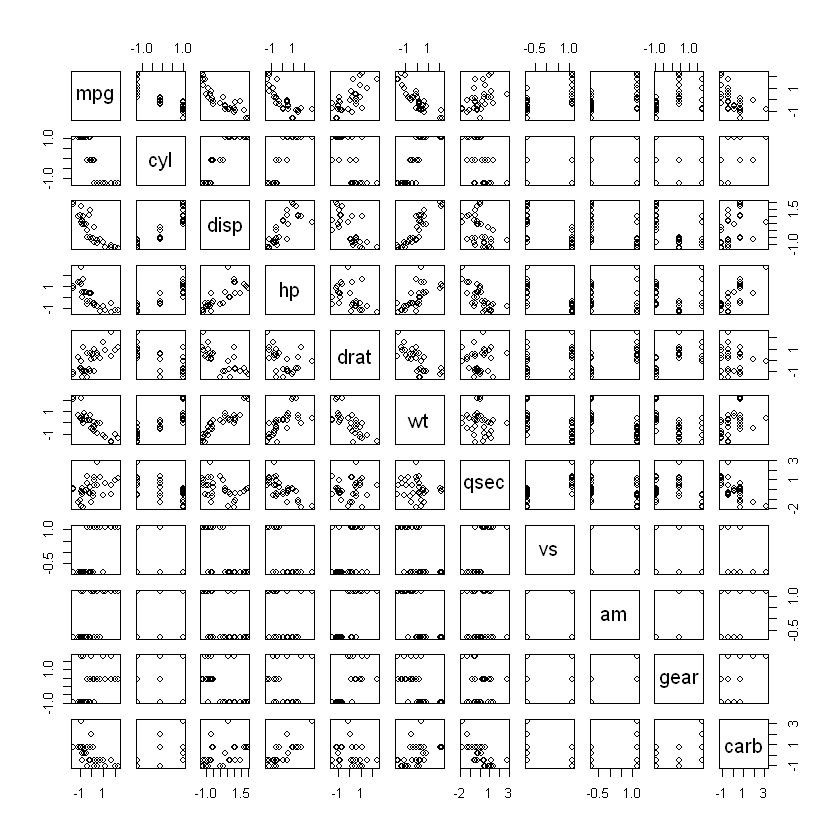

In [36]:
pairs(dt)

In [37]:
round(cor(dt),2)

In [38]:
cars_fit_lm <- lm(mpg~., dt)
summary(cars_fit_lm)


Call:
lm(formula = mpg ~ ., data = dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57254 -0.26620 -0.01985  0.20230  0.76773 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -1.613e-17  7.773e-02   0.000   1.0000  
cyl         -3.302e-02  3.097e-01  -0.107   0.9161  
disp         2.742e-01  3.672e-01   0.747   0.4635  
hp          -2.444e-01  2.476e-01  -0.987   0.3350  
drat         6.983e-02  1.451e-01   0.481   0.6353  
wt          -6.032e-01  3.076e-01  -1.961   0.0633 .
qsec         2.434e-01  2.167e-01   1.123   0.2739  
vs           2.657e-02  1.760e-01   0.151   0.8814  
am           2.087e-01  1.703e-01   1.225   0.2340  
gear         8.023e-02  1.828e-01   0.439   0.6652  
carb        -5.344e-02  2.221e-01  -0.241   0.8122  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4397 on 21 degrees of freedom
Multiple R-squared:  0.869, Adjusted R-squared:  0.8066 
F-statistic: 13.93 on 1

$H_0: \beta_1 = \beta_2 = \dots = 0$ 모형은 유의하게 나왔는데 각 변수는
모두 유의하지 않게 나옴..

In [40]:
vif(cars_fit_lm)

cyl 15.3738334034422 disp 21.6202410289589 hp 9.83203684435906 drat 3.37462000831475 wt 15.1648869639871 qsec 7.5279582252911 vs 4.96587346648472 am 4.64848745550015 gear 5.35745210594065 carb 7.90874675118444

# 능형회귀 (Ridge Regression)

## lm.ridge 함수 이용

In [41]:
rfit <- lm.ridge(mpg~., dt, lambda=seq(0.01,20,0.1))

In [42]:
select(rfit)

modified HKB estimator is 2.58585 
modified L-W estimator is 1.837435 
smallest value of GCV  at 14.91 

-   람다값 추천 GCV Generated Cross Validation mse를 가장 작게 하는
    람다값

In [43]:
round(rfit$coef[,rfit$lam=='0.21'],3)

cyl -0.032 disp 0.185 hp -0.211 drat 0.074 wt -0.52 qsec 0.207 vs 0.027 am 0.201 gear 0.082 carb -0.093

$\sum \hat{\beta_j}^2, \lambda = 0.21$

In [44]:
round(rfit$coef[,rfit$lam=='3.21'],3)

cyl -0.078 disp -0.049 hp -0.144 drat 0.086 wt -0.291 qsec 0.085 vs 0.041 am 0.169 gear 0.075 carb -0.175

$\sum \hat{\beta_j}^2, \lambda = 3.21$

In [45]:
round(rfit$coef[,rfit$lam=='14.91'],3)

cyl -0.109 disp -0.107 hp -0.13 drat 0.092 wt -0.197 qsec 0.047 vs 0.063 am 0.132 gear 0.066 carb -0.144

$\sum \hat{\beta_j}^2, \lambda = 14.91$

In [46]:
sum(rfit$coef[,rfit$lam=='0.21']^2)

0.455670466366229

In [47]:
sum(rfit$coef[,rfit$lam=='3.21']^2)

0.195026451544005

In [48]:
sum(rfit$coef[,rfit$lam=='14.91']^2)

0.135989355255868

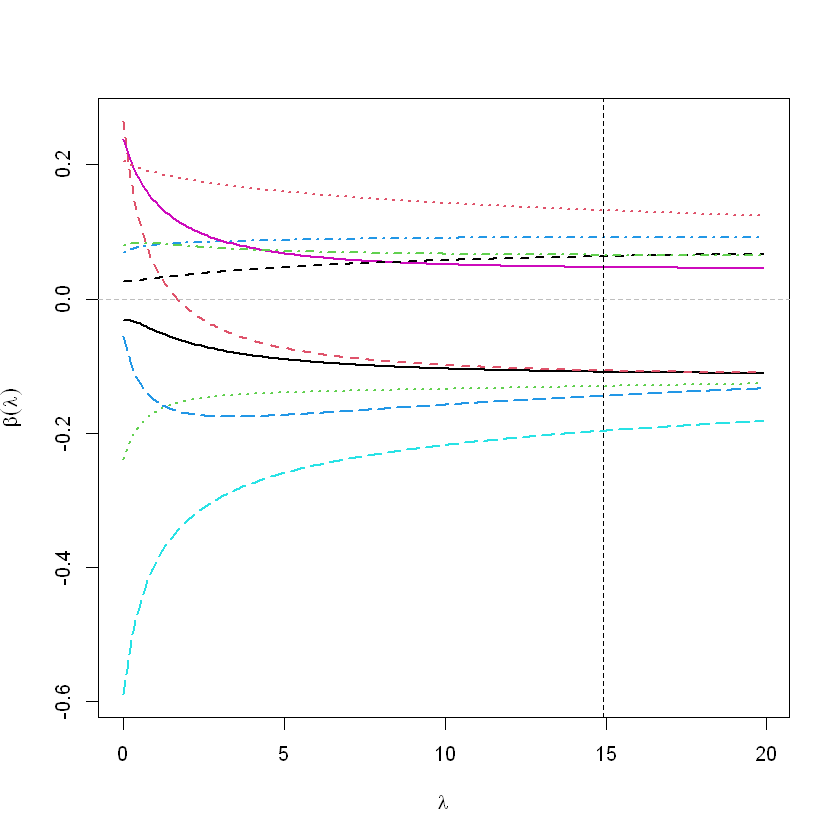

In [49]:
# graphics.off()
matplot(rfit$lambda, t(rfit$coef), type='l',
xlab=expression(lambda),
ylab=expression(bold(beta)(lambda)), lwd=2) 
abline(h=0, col="grey", lty=2)
abline(v=14.91, col="black", lty=2)

## glmnet 함수 이용

-   설명변수만 사용 상수항 없이

In [50]:
X <- model.matrix(mpg~., dt)[,-1]
y <- dt$mpg
head(X)

In [51]:
head(y)

0.150884824647657 0.150884824647657 0.449543446630647 0.217253407310543 -0.230734525663942 -0.330287399658272

In [56]:
ridge.fit<-glmnet(X,y,alpha=0, lambda=seq(0.01,20,0.1)) ##ridge : alpha=0 plot(ridge.fit, label=TRUE)

-   $\sum \hat{\beta}^2 \le t$ Ridge, $\sum |\hat{\beta}| \le t$ Rasso
-   $(1-\alpha)\sum \hat{\beta}^2 + \alpha \sum |\hat{\beta}| \le t$
-   alpha=0 $\to$ Ridge 쓰겠다.
-   alpha=0 $\to$ Rasso 쓰겠다.
-   alpha=0.5 $\to$ Ridge, Rasso 반절씩 쓰겠다.

In [59]:
cv.fit<-cv.glmnet(X,y,alpha=0,nfolds=length(y))
## Warning: Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per ## fold

Warning message:
"Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold"

-   cross validation

In [62]:
cv.fit


Call:  cv.glmnet(x = X, y = y, nfolds = 10, alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure      SE Nonzero
min 0.4558    82  0.2002 0.04900      10
1se 1.8399    67  0.2444 0.07153      10

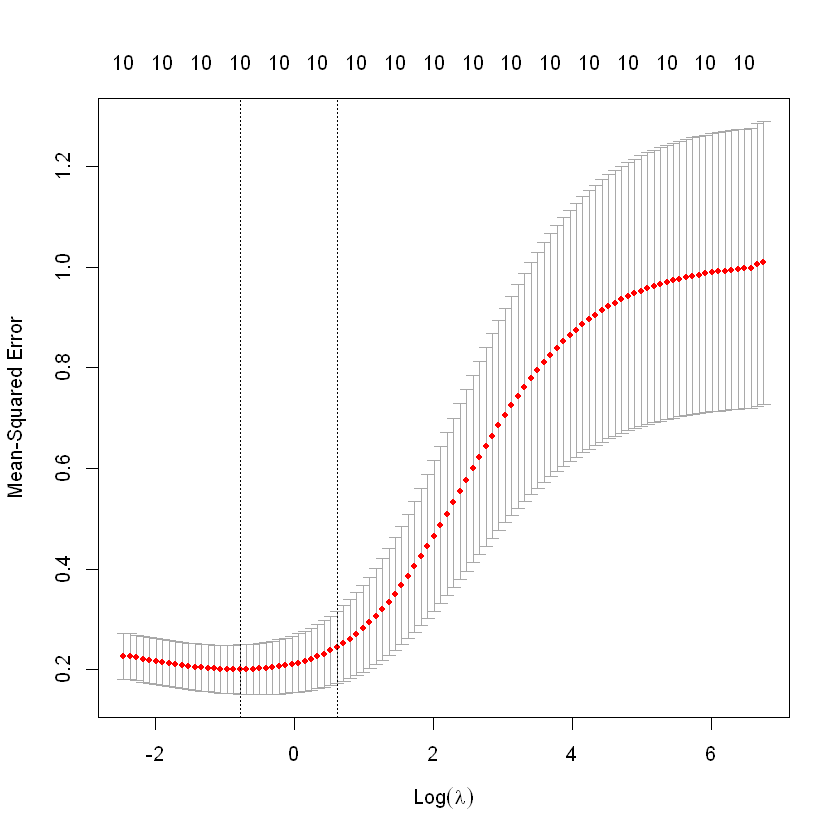

In [63]:
plot(cv.fit)
abline(h=0, col="grey", lty=2)

In [64]:
cv.fit<-cv.glmnet(X,y,alpha=0,nfolds=10)
cv.fit


Call:  cv.glmnet(x = X, y = y, nfolds = 10, alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure     SE Nonzero
min 0.4558    82  0.2165 0.0638      10
1se 2.2161    65  0.2756 0.1059      10

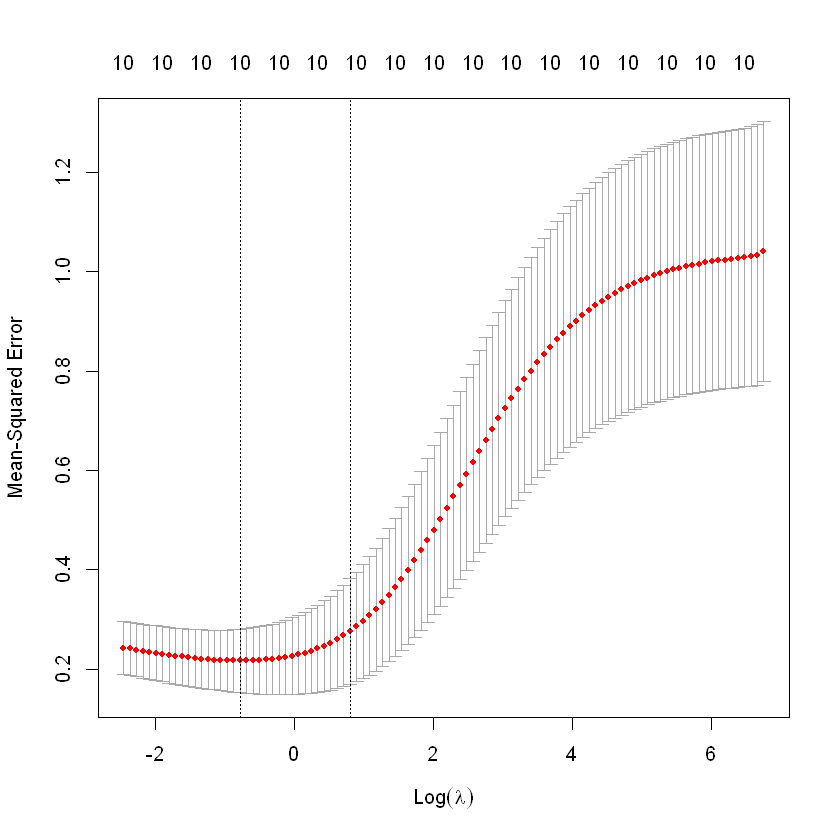

In [65]:
plot(cv.fit)

In [67]:
lam<-cv.fit$lambda.min;lam

0.455751230036319

In [69]:
log(lam)

-0.785808166499264

In [70]:
predict(ridge.fit,type="coefficients",s=lam)

11 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  8.341243e-17
cyl         -1.103002e-01
disp        -1.078123e-01
hp          -1.318526e-01
drat         9.325727e-02
wt          -2.004586e-01
qsec         4.817170e-02
vs           6.442374e-02
am           1.345790e-01
gear         6.679685e-02
carb        -1.470291e-01

-   $\hat{y}$구하고 싶으면 type을 `response`로 바꾸면 됌

## Lasso

In [71]:
lasso.fit<-glmnet(X,y,alpha=1, lambda=seq(0.01,20,0.1)) ##lasso : alpha=1 plot(lasso.fit, label=TRUE)

In [72]:
cv.lasso.fit<-cv.glmnet(X,y,alpha=1,nfolds=10)
cv.lasso.fit


Call:  cv.glmnet(x = X, y = y, nfolds = 10, alpha = 1) 

Measure: Mean-Squared Error 

    Lambda Index Measure      SE Nonzero
min 0.1211    22  0.2420 0.07897       3
1se 0.2796    13  0.3144 0.12750       3

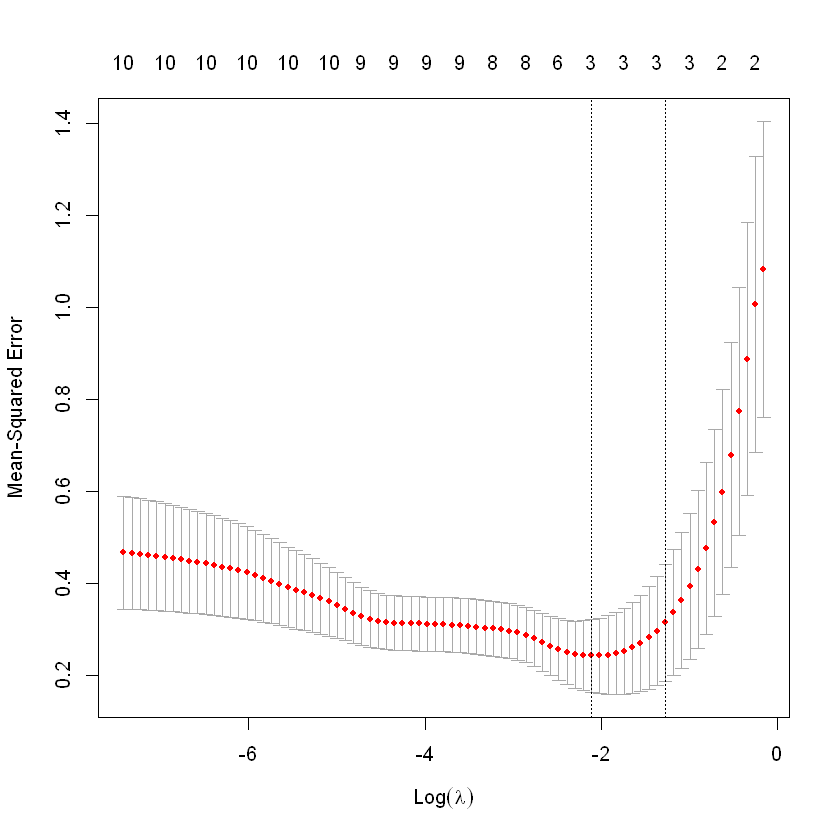

In [73]:
plot(cv.lasso.fit)